In [13]:
#!pip install pandas requests spacy seaborn

In [14]:
import pandas as pd
import seaborn as sns
import spacy
import requests
import json
import hashlib
import matplotlib.pyplot as plt

In [15]:
data = {
    'user': "Ezloplop",
    'group_text': "BehSci",
    'group': "Jk8bYJdN",
    'api_key': "my_api_key"
}

url_search = "https://api.hypothes.is/api/search"
url_ = "https://hypothes.is/groups/Jk8bYJdN/behsci"

In [16]:
res = requests.get(url=url_search, params={'group':'Jk8bYJdN', 'limit': 200}, headers={'Authorization': f"Bearer {data['api_key']}"})

In [17]:
json = res.json()
pd.DataFrame(json['rows'])

,id,created,updated,user,uri,text,tags,group,permissions,target,document,links,user_info,flagged,hidden
0,EFWynpMTEeyO3G9alGUJkA,2022-02-21T12:37:42.860894+00:00,2022-08-29T10:32:00.921505+00:00,acct:jackiekrauss@hypothes.is,https://securingdemocracy.gmfus.org/rt-deutsch...,"Schafer, B. (2021, October 5). RT Deutsch Find...","[is:blog, lang:en, RT Deutsch, anti-vaccinatio...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://securingdemocracy.gmfus.o...,{'title': ['RT Deutsch Finds a Home with Anti-...,{'html': 'https://hypothes.is/a/EFWynpMTEeyO3G...,{'display_name': None},False,False
1,dR7DsExZEeyc5Se_QXZPbw,2021-11-23T12:32:44.190592+00:00,2022-08-29T10:31:48.676007+00:00,acct:jackiekrauss@hypothes.is,https://www.newscientist.com/article/2298169-w...,"Sparkes, M. (2021, November 19). Wikipedia tes...","[is:news, lang:en, wikipedia, Artificial intel...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.newscientist.com/arti...,{'title': ['Wikipedia tests AI for spotting co...,{'html': 'https://hypothes.is/a/dR7DsExZEeyc5S...,{'display_name': None},False,False
2,1h_c6CztEeyMa1dlOOluOw,2021-10-14T12:54:15.213834+00:00,2022-08-29T10:31:42.805199+00:00,acct:jackiekrauss@hypothes.is,https://www.theguardian.com/world/2021/oct/11/...,"Henley, J. (2021, October 11). UK’s high Covid...","[is:news, lang:en, COVID-19, United Kingdom, E...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.theguardian.com/world...,{'title': ['UK’s high Covid case rates buck tr...,{'html': 'https://hypothes.is/a/1h_c6CztEeyMa1...,{'display_name': None},False,False
3,LVkBykCTEeypZte95Ybu5Q,2021-11-08T12:55:40.654202+00:00,2022-08-29T10:31:42.592685+00:00,acct:jackiekrauss@hypothes.is,https://twitter.com/BenPBradshaw/status/145545...,"Ben Bradshaw. (2021, November 2). More than 50...","[is:tweet, lang:en, COVID-19, parliament, Unit...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://twitter.com/BenPBradshaw/...,{'title': ['Ben Bradshaw on Twitter']},{'html': 'https://hypothes.is/a/LVkBykCTEeypZt...,{'display_name': None},False,False
4,TV8KuEuTEey7rLN9r-8Mdw,2021-11-22T12:54:17.160769+00:00,2022-08-29T10:31:42.583167+00:00,acct:jackiekrauss@hypothes.is,https://twitter.com/BlakesWort/status/14587947...,"Blake. (2021, November 11). Wie ungeheuer pein...","[is:tweet, lang:de, COVID-19, vaccine mandate,...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://twitter.com/BlakesWort/st...,{'title': ['Blake on Twitter']},{'html': 'https://hypothes.is/a/TV8KuEuTEey7rL...,{'display_name': None},False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,24lK6pMREeyhPscAz6EHug,2022-02-21T12:29:04.785330+00:00,2022-08-29T10:07:18.060401+00:00,acct:jackiekrauss@hypothes.is,https://elifesciences.org/articles/51230,"Li, Z., Tomlinson, A. C., Wong, A. H., Zhou, D...","[is:article, lang:en, COVID-19, receptor bindi...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://elifesciences.org/article...,{'title': ['The human coronavirus HCoV-229E S-...,{'html': 'https://hypothes.is/a/24lK6pMREeyhPs...,{'display_name': None},False,False
196,SGywilzZEeyUhI80YAwKjQ,2021-12-14T12:28:03.371475+00:00,2022-08-29T10:06:58.494756+00:00,acct:jackiekrauss@hypothes.is,https://theconversation.com/will-coronavirus-r...,"Yates, C., & Feil, E. (2021, February 1). Will...","[is:news, lang:en, COVID-19, mortality, post-p...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://theconversation.com/will-...,{'title': ['Will coronavirus really evolve to ...,{'html': 'https://hypothes.is/a/SGywilzZEeyUhI...,{'display_name': None},False,False
197,ZRuF1OoWEeu7u28m1bXPKw,2021-07-21T11:25:47.051432+00:00,2022-08-29T10:04:23.985943+00:00,acct:jackiekrauss@hypothes.is,https://www.bbc.com/news/uk-politics-57854811,Covid: Boris Johnson resisted autumn lockdown ...,

In [18]:
users = requests.get(url=f"https://api.hypothes.is/api/groups/{data['group']}/members")

In [19]:
users.json()[1]

{'authority': 'hypothes.is',
 'userid': 'acct:gailelhalaby@hypothes.is',
 'username': 'gailelhalaby',
 'display_name': None}

In [20]:
data_per_user = []
for user in users.json():
    print(user)
    user_id = user['userid']
    user_batch = []
    for i in range(0, 5000, 200):
        res = requests.get(url=url_search,
                           params={'group':'Jk8bYJdN', 'user':f'{user_id}', 'limit': 200, 'offset':i},
                           headers={'Authorization': f"Bearer {data['api_key']}"})
        user_batch.append(res.json())
    data_per_user.append(user_batch)

{'authority': 'hypothes.is', 'userid': 'acct:stefanherzog@hypothes.is', 'username': 'stefanherzog', 'display_name': 'Stefan Herzog'}
{'authority': 'hypothes.is', 'userid': 'acct:gailelhalaby@hypothes.is', 'username': 'gailelhalaby', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:Hahn@hypothes.is', 'username': 'Hahn', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:Marlene_Wulf@hypothes.is', 'username': 'Marlene_Wulf', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:edampf@hypothes.is', 'username': 'edampf', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:lewan@hypothes.is', 'username': 'lewan', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:MuhsinYesilada@hypothes.is', 'username': 'MuhsinYesilada', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:Danaeioak@hypothes.is', 'username': 'Danaeioak', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:amyhcurtis@h

In [21]:
total_anns = []
for batch in data_per_user:
    for elem in batch:
        total_anns += elem['rows']

In [22]:
total_anns_df = pd.DataFrame(total_anns)
total_anns_df.to_json('hypothesis_v1__12-03-22.jsonl', orient='records', lines=True)

In [23]:
total_anns_df

,id,created,updated,user,uri,text,tags,group,permissions,target,document,links,user_info,flagged,hidden
0,98Ms_oJLEeqbQuNZQjVbAg,2020-04-19T14:42:17.751689+00:00,2020-04-19T14:42:17.751689+00:00,acct:stefanherzog@hypothes.is,http://rocs.hu-berlin.de/corona/docs/forecast/...,,"[models, epidemiology, forecast]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://rocs.hu-berlin.de/corona/d...,{'title': ['Forecasts by Country']},{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQu...,{'display_name': 'Stefan Herzog'},False,False
1,915IIIJLEeqpiR84gpGFyQ,2020-04-19T14:42:17.192827+00:00,2020-04-19T14:42:17.192827+00:00,acct:stefanherzog@hypothes.is,https://www.reddit.com/r/BehSciResearch/commen...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.reddit.com/r/BehSciRe...,{'title': ['r/BehSciResearch - LitCovid: Curat...,{'html': 'https://hypothes.is/a/915IIIJLEeqpiR...,{'display_name': 'Stefan Herzog'},False,False
2,9yV4JIJLEeqSnPuUlknzzQ,2020-04-19T14:42:16.801220+00:00,2020-04-19T14:42:16.801220+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"{'title': ['Crisis research, fast and slow']}",{'html': 'https://hypothes.is/a/9yV4JIJLEeqSnP...,{'display_name': 'Stefan Herzog'},False,False
3,9smAKIJLEeq6HveQAipo6g,2020-04-19T14:42:16.156297+00:00,2020-04-19T14:42:16.156297+00:00,acct:stefanherzog@hypothes.is,https://www.ncbi.nlm.nih.gov/research/coronavi...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.ncbi.nlm.nih.gov/rese...,{'title': ['LitCovid - NCBI - NLM - NIH']},{'html': 'https://hypothes.is/a/9smAKIJLEeq6Hv...,{'display_name': 'Stefan Herzog'},False,False
4,9oZlroJLEeqbQSs8lamtlQ,2020-04-19T14:42:15.751624+00:00,2020-04-19T14:42:15.751624+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"{'title': ['Crisis research, fast and slow']}",{'html': 'https://hypothes.is/a/9oZlroJLEeqbQS...,{'display_name': 'Stefan Herzog'},False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44263,IqqGzNZdEeu7qW8TVqQlWA,2021-06-26T09:01:46.663954+00:00,2021-06-26T09:01:46.663954+00:00,acct:lucyparfitt16@hypothes.is,https://poseidon01.ssrn.com/delivery.php?ID=05...,2021-03-31,[has:date],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://poseidon01.ssrn.com/deliv...,{'title': ['Microsoft Word - Parry et al.docx']},{'html': 'https://hypothes.is/a/IqqGzNZdEeu7qW...,{'display_name': None},False,False
44264,GzcHitZdEeu3utsN1zIlXA,2021-06-26T09:01:34.146545+00:00,2021-06-26T09:01:34.146545+00:00,acct:lucyparfitt16@hypothes.is,https://poseidon01.ssrn.com/delivery.php?ID=05...,"Parry, H. M., Tut, G., Faustini, S., Stephens,...","[is:preprint, lang:en, COVID-19, vaccine, immu...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://poseidon01.ssrn.com/deliv...,{'title': ['Microsoft Word - Parry et al.docx']},{'html': 'https://hypothes.is/a/GzcHitZdEeu3ut...,{'display_name': None},False,False
44265,tkTclNZcEeu7dhcV5i6TGA,2021-06-26T08:58:44.804883+00:00,2021-06-26T08:58:44.804883+00:00,acct:lucyparfitt16@hypothes.is,https://poseidon01.ssrn.com/delivery.php?ID=05...,,[ann:summary],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://poseidon01.ssrn.com/deliv...,{'title': ['Microsoft Word - Parry et al.docx']},{'html': 'https://hypothes.is/a/tkTclNZcEeu7dh...,{'display_name': None},False,False
44266,p5oL9tZcEeuXK79Bg_WtoA,2021-06-26T08:58:20.188404+00:00,2021-06-26T08:58:20.188404+00:00,acct:lucyparfitt16@hypothes.is,https://poseidon01.ssrn.com/delivery.php?ID=05...,,[ann:title],Jk8bYJdN

### Data Exploration

In [24]:
# Utils
def generate_id(string: str):
    return hashlib.sha1(string.encode("utf-8")).hexdigest()

----

In [25]:
total_anns_df = pd.read_json('hypothesis_v1__12-03-22.jsonl', orient='records', lines=True)

# Below line is deleted. I have no idea what does .copy() do, but it certainly made difference in the values of at least in the column 'document'
# _total_anns_df = pd.read_json('hypothesis_v1__12-03-22.jsonl', orient='records', lines=True)
# total_anns_df = _total_anns_df.copy()

<p style="color:red;"> Q. Above cell. Why did you use .copy? making any difference?</p>


In [26]:
total_anns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44268 entries, 0 to 44267
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           44268 non-null  object
 1   created      44268 non-null  object
 2   updated      44268 non-null  object
 3   user         44268 non-null  object
 4   uri          44268 non-null  object
 5   text         44268 non-null  object
 6   tags         44268 non-null  object
 7   group        44268 non-null  object
 8   permissions  44268 non-null  object
 9   target       44268 non-null  object
 10  document     44268 non-null  object
 11  links        44268 non-null  object
 12  user_info    44268 non-null  object
 13  flagged      44268 non-null  bool  
 14  hidden       44268 non-null  bool  
dtypes: bool(2), object(13)
memory usage: 4.5+ MB


In [27]:
total_anns_df.head(5)

,id,created,updated,user,uri,text,tags,group,permissions,target,document,links,user_info,flagged,hidden
0,98Ms_oJLEeqbQuNZQjVbAg,2020-04-19T14:42:17.751689+00:00,2020-04-19T14:42:17.751689+00:00,acct:stefanherzog@hypothes.is,http://rocs.hu-berlin.de/corona/docs/forecast/...,,"[models, epidemiology, forecast]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://rocs.hu-berlin.de/corona/d...,{'title': ['Forecasts by Country']},{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQu...,{'display_name': 'Stefan Herzog'},False,False
1,915IIIJLEeqpiR84gpGFyQ,2020-04-19T14:42:17.192827+00:00,2020-04-19T14:42:17.192827+00:00,acct:stefanherzog@hypothes.is,https://www.reddit.com/r/BehSciResearch/commen...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.reddit.com/r/BehSciRe...,{'title': ['r/BehSciResearch - LitCovid: Curat...,{'html': 'https://hypothes.is/a/915IIIJLEeqpiR...,{'display_name': 'Stefan Herzog'},False,False
2,9yV4JIJLEeqSnPuUlknzzQ,2020-04-19T14:42:16.801220+00:00,2020-04-19T14:42:16.801220+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"{'title': ['Crisis research, fast and slow']}",{'html': 'https://hypothes.is/a/9yV4JIJLEeqSnP...,{'display_name': 'Stefan Herzog'},False,False
3,9smAKIJLEeq6HveQAipo6g,2020-04-19T14:42:16.156297+00:00,2020-04-19T14:42:16.156297+00:00,acct:stefanherzog@hypothes.is,https://www.ncbi.nlm.nih.gov/research/coronavi...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.ncbi.nlm.nih.gov/rese...,{'title': ['LitCovid - NCBI - NLM - NIH']},{'html': 'https://hypothes.is/a/9smAKIJLEeq6Hv...,{'display_name': 'Stefan Herzog'},False,False
4,9oZlroJLEeqbQSs8lamtlQ,2020-04-19T14:42:15.751624+00:00,2020-04-19T14:42:15.751624+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"{'title': ['Crisis research, fast and slow']}",{'html': 'https://hypothes.is/a/9oZlroJLEeqbQS...,{'display_name': 'Stefan Herzog'},False,False


In [28]:
#If the text is not empty, then choose them: dataframe.query function. 

In [29]:
total_anns_df.query('text != ""')[['id', 'text']]

,id,text
41,8OIJqoJLEeqUwDuNOoQ9xw,"Pennycook, G., McPhetres, J., Zhang, Y., & Ran..."
45,8ELDaIJLEeqjfKcjMBct1A,2020-03-31
50,72WlMoJLEeqzTaepOzWXmw,"Why does hypothes.is show this as ""r/PublicPol..."
56,GKTDUOxqEeqdGgO3KOC83Q,https://twitter.com/ImperialMed/status/1300375...
57,-vsbTOxpEeq_kMdMttrjaA,2020\n
...,...,...
44259,nXwluNZdEeu3vcv8gBb4GQ,2021-04-01
44260,lxgYJtZdEeuQ8F-gZ-Ae9w,Long Covid: Snapshot poll finds more than 1m p...
44263,IqqGzNZdEeu7qW8TVqQlWA,2021-03-31
44264,GzcHitZdEeu3utsN1zIlXA,"Parry, H. M., Tut, G., Faustini, S., Stephens,..."


In [30]:
print(f"Unique documents: {len(total_anns_df.uri.unique())}")

Unique documents: 9001


In [31]:
# Generate doc_id from the uri using user-defined function: generate_id, only for the unique document. 

In [32]:
total_anns_df['doc_id'] = total_anns_df['uri'].apply(lambda doc: generate_id(doc))

In [33]:
total_anns_df.head(5)

,id,created,updated,user,uri,text,tags,group,permissions,target,document,links,user_info,flagged,hidden,doc_id
0,98Ms_oJLEeqbQuNZQjVbAg,2020-04-19T14:42:17.751689+00:00,2020-04-19T14:42:17.751689+00:00,acct:stefanherzog@hypothes.is,http://rocs.hu-berlin.de/corona/docs/forecast/...,,"[models, epidemiology, forecast]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://rocs.hu-berlin.de/corona/d...,{'title': ['Forecasts by Country']},{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQu...,{'display_name': 'Stefan Herzog'},False,False,1bae7c2fba0901589c8732057a5e03123ee18657
1,915IIIJLEeqpiR84gpGFyQ,2020-04-19T14:42:17.192827+00:00,2020-04-19T14:42:17.192827+00:00,acct:stefanherzog@hypothes.is,https://www.reddit.com/r/BehSciResearch/commen...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.reddit.com/r/BehSciRe...,{'title': ['r/BehSciResearch - LitCovid: Curat...,{'html': 'https://hypothes.is/a/915IIIJLEeqpiR...,{'display_name': 'Stefan Herzog'},False,False,d5624117db7c3567bfcbddfb1b724579fb7e1eca
2,9yV4JIJLEeqSnPuUlknzzQ,2020-04-19T14:42:16.801220+00:00,2020-04-19T14:42:16.801220+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"{'title': ['Crisis research, fast and slow']}",{'html': 'https://hypothes.is/a/9yV4JIJLEeqSnP...,{'display_name': 'Stefan Herzog'},False,False,a30f8a303e30393880dfd0689a13f06402201842
3,9smAKIJLEeq6HveQAipo6g,2020-04-19T14:42:16.156297+00:00,2020-04-19T14:42:16.156297+00:00,acct:stefanherzog@hypothes.is,https://www.ncbi.nlm.nih.gov/research/coronavi...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.ncbi.nlm.nih.gov/rese...,{'title': ['LitCovid - NCBI - NLM - NIH']},{'html': 'https://hypothes.is/a/9smAKIJLEeq6Hv...,{'display_name': 'Stefan Herzog'},False,False,e593d53590429e8768fe9fc7bd8a95bcb23b361f
4,9oZlroJLEeqbQSs8lamtlQ,2020-04-19T14:42:15.751624+00:00,2020-04-19T14:42:15.751624+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"{'title': ['Crisis research, fast and slow']}",{'html': 'https://hypothes.is/a/9oZlroJLEeqbQS...,{'display_name': 'Stefan Herzog'},False,False,a30f8a303e30393880dfd0689a13f06402201842


In [34]:
all_tags = total_anns_df.tags.sum()

In [35]:
len(all_tags)

145633

In [36]:
# Counting hashable objects
from collections import Counter

In [37]:
unique_tags = Counter(all_tags)

In [38]:
len(unique_tags) # Total number of unique tags existing in the dataset.

16474

In [39]:
unique_tags

Counter({'models': 7,
         'epidemiology': 394,
         'forecast': 37,
         'literature': 19,
         'research': 824,
         'curation': 5,
         'interventions': 5,
         'summary': 17,
         'ann:text': 4319,
         'big data': 73,
         'news': 85,
         'resource': 21,
         'media': 153,
         'type:blog': 1,
         'misinformation': 708,
         'nudge': 13,
         'social media': 344,
         'type:preprint': 1,
         'is:twitter': 762,
         'ann:doi': 3088,
         'ann:title': 6841,
         'has:problem': 77,
         'has:context': 5401,
         'has:date-approx': 514,
         'is:webpage': 996,
         'lang:en': 8534,
         'racism': 34,
         'COVID-19': 7364,
         'coronavirus': 58,
         'pandemic': 1028,
         'ethnic discrimination': 1,
         'intersecting pandemic': 1,
         'BAME': 12,
         'policy solution': 1,
         'healthcare inequality': 1,
         'ethnic minority': 13,
       

In [40]:
def create_tag_columns(row):
    row['is:'] = []
    row['has:'] = []
    row['ann:'] = []
    row['lang:'] = []
    row['terms_tags'] = []
    for tag in row['tags']:
        #tags = tags.replace('[','').replace(']','').split(',')
        #for tag in tags:
        if 'is:' in tag:
            row['is:'].append(tag.split(':')[1])
        elif 'has:' in tag:
            row['has:'].append(tag.split(':')[1])
        elif 'ann:' in tag:
            row['ann:'].append(tag.split(':')[1])
        elif 'lang:' in tag:
            row['lang:'].append(tag.split(':')[1])
        else:
            row['terms_tags'].append(tag)
    return row

def create_type_columns(row):
    for col in ['is:', 'has:', 'ann:']:
        for val in row[col]:
            row[f"{col.replace(':','')}_{val}"] = True
    return row

In [41]:
#from ast import literal_eval
#total_anns_df['tags'] = total_anns_df['tags'].apply(lambda str_list: literal_eval(str_list) if type(str_list) == 'str' else str_list)

In [42]:
total_anns_df = total_anns_df.apply(lambda row: create_tag_columns(row), axis=1)

# "Dataset formatting"

In [43]:
# Column 'id' is the row 'id'
len(total_anns_df) == len(total_anns_df['id'].unique())

True

In [179]:
# What are the values of the column target.
total_anns_df['target'][0]

[{'source': 'http://rocs.hu-berlin.de/corona/docs/forecast/results_by_country/',
  'selector': [{'type': 'RangeSelector',
    'endOffset': 370,
    'startOffset': 29,
    'endContainer': '/main[1]/div[1]/article[1]/p[4]',
    'startContainer': '/main[1]/div[1]/article[1]/p[2]'},
   {'end': 1597, 'type': 'TextPositionSelector', 'start': 128},
   {'type': 'TextQuoteSelector',
    'exact': "6-day forecasts of COVID-19 case counts by country based on a novel epidemiological model that integrates the effect of population behavior changes due to government measures and social distancing.The SIR-X model is described in detail here: Effective containment explains sub-exponential growth in confirmed cases of recent COVID-19 outbreak in Mainland China, B. F. Maier & D. Brockmann, medRxiv, https://doi.org/10.1101/2020.02.18.20024414, (2020)The containment measures implemented in response to the growing pandemic vary drastically by country. Classical epidemiological models fail to capture the impa

## 2nd round: "type - textquoteSelector" we need to search if it is used, sometimes the text column is empty but the texts are in another column". 

* Check for the cases if the text is empty and the text values are in another column -> to determine how many empty values are that are actually Null valued. 

In [46]:
total_anns_df['text'][100]

'Gusso, H., Archer, A. B., Luiz, F. B., Sahão, F. T., de Luca, G. G., Henklain, M., Panosso, M. G., Kienen, N., Beltramello, O., & Gonçalves, V. M. (2020). Higher Education in the Times of Pandemic: University management guidelines [Preprint]. PsyArXiv. https://doi.org/10.31234/osf.io/by5xj\n'

## Data structure to make it - below

In [47]:
'''
documents = [
    {
        "_id": "id",  # 
        "document_uri": "uri", #from df
        "document ": "document", # from df,
        "tags": [], # groupby uri -> concatenated lists of tags 
        "annotations": [ # groupby uri -> each row is dict for the columns "text", "tags", "target", "links"
            {
                "ann_id": "id from the row"
                "tags": []
                "target": [],
                "text": str,
                "links": dict
            }, {

            } 
        ]
    }
]
'''

'\ndocuments = [\n    {\n        "_id": "id",  # \n        "document_uri": "uri", #from df\n        "content": "document", # from df,\n        "tags": [], # groupby uri -> concatenated lists of tags \n        "annotations": [ # groupby uri -> each row is dict for the columns "text", "tags", "target", "links"\n            {\n                "ann_id": "id from the row"\n                "tags": []\n                "target": [],\n                "text": str,\n                "links": dict\n            }, {\n\n            } \n        ]\n    }\n]\n'

Steps to get the document defined above (after cleaning steps)
1. Generate doc_id
2. Group dataset by doc_id
3. The top level of the document object comes from properties across rows (groupby) meaning that all the rows in that group have these same properties.
4. The object annotations contains all the info coming from individual rows within the group (1 row = 1 dict in the list)
5. Within these annotations, all fields come unchanged except "text", that sometimes requires extraction other column (for example target)
6. Elastic search running? check

cf. data structure - dictionary default. 

### "text -> it may come from another column, so need some processing."

In [48]:
total_anns_df.columns

Index(['id', 'created', 'updated', 'user', 'uri', 'text', 'tags', 'group',
       'permissions', 'target', 'document', 'links', 'user_info', 'flagged',
       'hidden', 'doc_id', 'is:', 'has:', 'ann:', 'lang:', 'terms_tags'],
      dtype='object')

In [51]:
# KeyError in the column document - Not all of them has 'title' key
# len(document without contents) == 112 
b = 0
for i in total_anns_df['document']:

    if i.get("title") == None: 
        b = b + 1
print(b, ": the number of the documents without contents.")


112


### Deleting some rows of Dataframe

There are rows without title value in 'document' column -> deletion

In [182]:
indexes = []
for i in range(len(total_anns_df)): 
    if total_anns_df['document'].loc[i] == {}:
        indexes.append(i)
        
total_anns_df_doc = total_anns_df.drop(total_anns_df.index[indexes])

In [183]:
total_anns_df_doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44156 entries, 0 to 44267
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           44156 non-null  object
 1   created      44156 non-null  object
 2   updated      44156 non-null  object
 3   user         44156 non-null  object
 4   uri          44156 non-null  object
 5   text         44156 non-null  object
 6   tags         44156 non-null  object
 7   group        44156 non-null  object
 8   permissions  44156 non-null  object
 9   target       44156 non-null  object
 10  document     44156 non-null  object
 11  links        44156 non-null  object
 12  user_info    44156 non-null  object
 13  flagged      44156 non-null  bool  
 14  hidden       44156 non-null  bool  
 15  doc_id       44156 non-null  object
 16  is:          44156 non-null  object
 17  has:         44156 non-null  object
 18  ann:         44156 non-null  object
 19  lang:        44156 non-nu

In [184]:
total_anns_df_doc['document']

0                      {'title': ['Forecasts by Country']}
1        {'title': ['r/BehSciResearch - LitCovid: Curat...
2            {'title': ['Crisis research, fast and slow']}
3               {'title': ['LitCovid - NCBI - NLM - NIH']}
4            {'title': ['Crisis research, fast and slow']}
                               ...                        
44263     {'title': ['Microsoft Word - Parry et al.docx']}
44264     {'title': ['Microsoft Word - Parry et al.docx']}
44265     {'title': ['Microsoft Word - Parry et al.docx']}
44266     {'title': ['Microsoft Word - Parry et al.docx']}
44267    {'title': ['f4d9b9_fddbfb2a0c05461cb4bdce2892f...
Name: document, Length: 44156, dtype: object

### "There are only field title in document column -> show it", "content->document column name"

In [185]:
temp = list(total_anns_df_doc['document'])
values = []
for i in temp:
    values.append(i.get("title")[0])

# If the number of values of title is the same as the number of the all values in document column    
len(values)

44156

In [186]:
# Processed values of the column 'document'.
values[:10]

['Forecasts by Country',
 'r/BehSciResearch - LitCovid: Curated literature hub for tracking up-to-date scientific information about the 2019 novel Coronavirus',
 'Crisis research, fast and slow',
 'LitCovid - NCBI - NLM - NIH',
 'Crisis research, fast and slow',
 'Crisis research, fast and slow',
 'Crisis research, fast and slow',
 'Crisis research, fast and slow',
 'Crisis research, fast and slow',
 'Crisis research, fast and slow']

In [111]:
# Replace the values of column 'document' to the processed data 'values'
total_anns_df_doc['document'] = values

In [114]:
len(total_anns_df_doc['document'].unique()) == len(total_anns_df_doc['uri'].unique())

False

In [113]:
total_anns_df_doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44156 entries, 0 to 44267
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           44156 non-null  object
 1   created      44156 non-null  object
 2   updated      44156 non-null  object
 3   user         44156 non-null  object
 4   uri          44156 non-null  object
 5   text         44156 non-null  object
 6   tags         44156 non-null  object
 7   group        44156 non-null  object
 8   permissions  44156 non-null  object
 9   target       44156 non-null  object
 10  document     44156 non-null  object
 11  links        44156 non-null  object
 12  user_info    44156 non-null  object
 13  flagged      44156 non-null  bool  
 14  hidden       44156 non-null  bool  
 15  doc_id       44156 non-null  object
 16  is:          44156 non-null  object
 17  has:         44156 non-null  object
 18  ann:         44156 non-null  object
 19  lang:        44156 non-nu

In [115]:
len(total_anns_df_doc['document'].unique()) == len(total_anns_df_doc['uri'])

False

Problem) The number of unique values of the column 'document' and 'uri' is different, and which to make key? 

<p style="color:red;">There is a question that one title might have more than one uri. In this case, I chose to have document title. This is because some of the uri has additional texts that can be ommitted in another way to retrieve it</p>

sol) for example, there is an argument like this

cf. "Why multiple URLs redirect to the same websites?"

https://moz.com/community/q/topic/58696/i-have-multiple-urls-that-redirect-to-the-same-website-is-this-an-issue/3


## "3rd round: Document -> multiple uri : Show it" 

In [116]:
# Resetting the index as deleting the rows without document information before.
total_anns_df_doc = total_anns_df_doc.reset_index(drop = True)

In [117]:
total_anns_df_doc.head(5)

,id,created,updated,user,uri,text,tags,group,permissions,target,...,links,user_info,flagged,hidden,doc_id,is:,has:,ann:,lang:,terms_tags
0,98Ms_oJLEeqbQuNZQjVbAg,2020-04-19T14:42:17.751689+00:00,2020-04-19T14:42:17.751689+00:00,acct:stefanherzog@hypothes.is,http://rocs.hu-berlin.de/corona/docs/forecast/...,,"[models, epidemiology, forecast]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://rocs.hu-berlin.de/corona/d...,...,{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQu...,{'display_name': 'Stefan Herzog'},False,False,1bae7c2fba0901589c8732057a5e03123ee18657,[],[],[],[],"[models, epidemiology, forecast]"
1,915IIIJLEeqpiR84gpGFyQ,2020-04-19T14:42:17.192827+00:00,2020-04-19T14:42:17.192827+00:00,acct:stefanherzog@hypothes.is,https://www.reddit.com/r/BehSciResearch/commen...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.reddit.com/r/BehSciRe...,...,{'html': 'https://hypothes.is/a/915IIIJLEeqpiR...,{'display_name': 'Stefan Herzog'},False,False,d5624117db7c3567bfcbddfb1b724579fb7e1eca,[],[],[],[],"[literature, research, curation]"
2,9yV4JIJLEeqSnPuUlknzzQ,2020-04-19T14:42:16.801220+00:00,2020-04-19T14:42:16.801220+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,...,{'html': 'https://hypothes.is/a/9yV4JIJLEeqSnP...,{'display_name': 'Stefan Herzog'},False,False,a30f8a303e30393880dfd0689a13f06402201842,[],[],[],[],[]
3,9smAKIJLEeq6HveQAipo6g,2020-04-19T14:42:16.156297+00:00,2020-04-19T14:42:16.156297+00:00,acct:stefanherzog@hypothes.is,https://www.ncbi.nlm.nih.gov/research/coronavi...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.ncbi.nlm.nih.gov/rese...,...,{'html': 'https://hypothes.is/a/9smAKIJLEeq6Hv...,{'display_name': 'Stefan Herzog'},False,False,e593d53590429e8768fe9fc7bd8a95bcb23b361f,[],[],[],[],"[literature, research, curation]"
4,9oZlroJLEeqbQSs8lamtlQ,2020-04-19T14:42:15.751624+00:00,2020-04-19T14:42:15.751624+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,...,{'html': 'https://hypothes.is/a/9oZlroJLEeqbQS...,{'display_name': 'Stefan Herzog'},False,False,a30f8a303e30393880dfd0689a13f06402201842,[],[],[],[],[]


In [118]:
total_anns_df_doc.columns

Index(['id', 'created', 'updated', 'user', 'uri', 'text', 'tags', 'group',
       'permissions', 'target', 'document', 'links', 'user_info', 'flagged',
       'hidden', 'doc_id', 'is:', 'has:', 'ann:', 'lang:', 'terms_tags'],
      dtype='object')

### Selecting only the columns needed.

In [119]:
df = total_anns_df_doc.drop(columns=['doc_id', 'is:', 'has:', 'ann:', 'lang:'], axis = 1)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44156 entries, 0 to 44155
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           44156 non-null  object
 1   created      44156 non-null  object
 2   updated      44156 non-null  object
 3   user         44156 non-null  object
 4   uri          44156 non-null  object
 5   text         44156 non-null  object
 6   tags         44156 non-null  object
 7   group        44156 non-null  object
 8   permissions  44156 non-null  object
 9   target       44156 non-null  object
 10  document     44156 non-null  object
 11  links        44156 non-null  object
 12  user_info    44156 non-null  object
 13  flagged      44156 non-null  bool  
 14  hidden       44156 non-null  bool  
 15  terms_tags   44156 non-null  object
dtypes: bool(2), object(14)
memory usage: 4.8+ MB


In [190]:
print(df.columns)

Index(['ann_id', 'created', 'updated', 'user', 'uri', 'text', 'tags', 'group',
       'permissions', 'target', 'content', 'links', 'user_info', 'flagged',
       'hidden', 'terms_tags', 'doc_id', 'doc_tags'],
      dtype='object')


### "keep links as a field, target"

In [121]:
# What is the difference between target, uri and link? 
print("target 0: ", df['target'][0], "\n")
print("uri 0:", df['uri'][0], "\n")
print("links 0:", df['links'][0])

# Check if df['links'] has one and only item - 'html'? 
# No. It has more than html, for example, 
df['links'][0]

target 0:  [{'source': 'http://rocs.hu-berlin.de/corona/docs/forecast/results_by_country/', 'selector': [{'type': 'RangeSelector', 'endOffset': 370, 'startOffset': 29, 'endContainer': '/main[1]/div[1]/article[1]/p[4]', 'startContainer': '/main[1]/div[1]/article[1]/p[2]'}, {'end': 1597, 'type': 'TextPositionSelector', 'start': 128}, {'type': 'TextQuoteSelector', 'exact': "6-day forecasts of COVID-19 case counts by country based on a novel epidemiological model that integrates the effect of population behavior changes due to government measures and social distancing.The SIR-X model is described in detail here: Effective containment explains sub-exponential growth in confirmed cases of recent COVID-19 outbreak in Mainland China, B. F. Maier & D. Brockmann, medRxiv, https://doi.org/10.1101/2020.02.18.20024414, (2020)The containment measures implemented in response to the growing pandemic vary drastically by country. Classical epidemiological models fail to capture the impact of such effort

{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQuNZQjVbAg',
 'incontext': 'https://hyp.is/98Ms_oJLEeqbQuNZQjVbAg/rocs.hu-berlin.de/corona/docs/forecast/results_by_country/',
 'json': 'https://hypothes.is/api/annotations/98Ms_oJLEeqbQuNZQjVbAg'}

<p style="color:red;">Question: What is the difference between target, uri and links? And what do we need between them?</p>

In [123]:
df['doc_id'] = df['document'].apply(lambda doc: generate_id(doc))

In [124]:
df.head(5)

,id,created,updated,user,uri,text,tags,group,permissions,target,document,links,user_info,flagged,hidden,terms_tags,doc_id
0,98Ms_oJLEeqbQuNZQjVbAg,2020-04-19T14:42:17.751689+00:00,2020-04-19T14:42:17.751689+00:00,acct:stefanherzog@hypothes.is,http://rocs.hu-berlin.de/corona/docs/forecast/...,,"[models, epidemiology, forecast]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://rocs.hu-berlin.de/corona/d...,Forecasts by Country,{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQu...,{'display_name': 'Stefan Herzog'},False,False,"[models, epidemiology, forecast]",1560c64c01498361f3ecf222d56d1d5143b1260d
1,915IIIJLEeqpiR84gpGFyQ,2020-04-19T14:42:17.192827+00:00,2020-04-19T14:42:17.192827+00:00,acct:stefanherzog@hypothes.is,https://www.reddit.com/r/BehSciResearch/commen...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.reddit.com/r/BehSciRe...,r/BehSciResearch - LitCovid: Curated literatur...,{'html': 'https://hypothes.is/a/915IIIJLEeqpiR...,{'display_name': 'Stefan Herzog'},False,False,"[literature, research, curation]",cda3d7d512adb56ec540909c615f8a65a0e20f49
2,9yV4JIJLEeqSnPuUlknzzQ,2020-04-19T14:42:16.801220+00:00,2020-04-19T14:42:16.801220+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"Crisis research, fast and slow",{'html': 'https://hypothes.is/a/9yV4JIJLEeqSnP...,{'display_name': 'Stefan Herzog'},False,False,[],038882e78d37e5e2363a165bb4280894d25a0932
3,9smAKIJLEeq6HveQAipo6g,2020-04-19T14:42:16.156297+00:00,2020-04-19T14:42:16.156297+00:00,acct:stefanherzog@hypothes.is,https://www.ncbi.nlm.nih.gov/research/coronavi...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.ncbi.nlm.nih.gov/rese...,LitCovid - NCBI - NLM - NIH,{'html': 'https://hypothes.is/a/9smAKIJLEeq6Hv...,{'display_name': 'Stefan Herzog'},False,False,"[literature, research, curation]",1ae5cfb64d01e19b6b5a40eee9a59c3b71175663
4,9oZlroJLEeqbQSs8lamtlQ,2020-04-19T14:42:15.751624+00:00,2020-04-19T14:42:15.751624+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"Crisis research, fast and slow",{'html': 'https://hypothes.is/a/9oZlroJLEeqbQS...,{'display_name': 'Stefan Herzog'},False,False,[],038882e78d37e5e2363a165bb4280894d25a0932


In [129]:
# The document id is unique and it has the same number as the values of the column 'document'

len(df['doc_id'].unique())

7539

In [138]:
df[['id', 'tags', 'target', 'text', 'links', 'doc_id']].head(2)

,id,tags,target,text,links,doc_id
0,98Ms_oJLEeqbQuNZQjVbAg,"[models, epidemiology, forecast]",[{'source': 'http://rocs.hu-berlin.de/corona/d...,,{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQu...,1560c64c01498361f3ecf222d56d1d5143b1260d
1,915IIIJLEeqpiR84gpGFyQ,"[literature, research, curation]",[{'source': 'https://www.reddit.com/r/BehSciRe...,,{'html': 'https://hypothes.is/a/915IIIJLEeqpiR...,cda3d7d512adb56ec540909c615f8a65a0e20f49


In [134]:
df['target'][0]

[{'source': 'http://rocs.hu-berlin.de/corona/docs/forecast/results_by_country/',
  'selector': [{'type': 'RangeSelector',
    'endOffset': 370,
    'startOffset': 29,
    'endContainer': '/main[1]/div[1]/article[1]/p[4]',
    'startContainer': '/main[1]/div[1]/article[1]/p[2]'},
   {'end': 1597, 'type': 'TextPositionSelector', 'start': 128},
   {'type': 'TextQuoteSelector',
    'exact': "6-day forecasts of COVID-19 case counts by country based on a novel epidemiological model that integrates the effect of population behavior changes due to government measures and social distancing.The SIR-X model is described in detail here: Effective containment explains sub-exponential growth in confirmed cases of recent COVID-19 outbreak in Mainland China, B. F. Maier & D. Brockmann, medRxiv, https://doi.org/10.1101/2020.02.18.20024414, (2020)The containment measures implemented in response to the growing pandemic vary drastically by country. Classical epidemiological models fail to capture the impa

In [135]:
df['links'][0]

{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQuNZQjVbAg',
 'incontext': 'https://hyp.is/98Ms_oJLEeqbQuNZQjVbAg/rocs.hu-berlin.de/corona/docs/forecast/results_by_country/',
 'json': 'https://hypothes.is/api/annotations/98Ms_oJLEeqbQuNZQjVbAg'}

In [140]:
df.head(5)

,id,created,updated,user,uri,text,tags,group,permissions,target,document,links,user_info,flagged,hidden,terms_tags,doc_id
0,98Ms_oJLEeqbQuNZQjVbAg,2020-04-19T14:42:17.751689+00:00,2020-04-19T14:42:17.751689+00:00,acct:stefanherzog@hypothes.is,http://rocs.hu-berlin.de/corona/docs/forecast/...,,"[models, epidemiology, forecast]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://rocs.hu-berlin.de/corona/d...,Forecasts by Country,{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQu...,{'display_name': 'Stefan Herzog'},False,False,"[models, epidemiology, forecast]",1560c64c01498361f3ecf222d56d1d5143b1260d
1,915IIIJLEeqpiR84gpGFyQ,2020-04-19T14:42:17.192827+00:00,2020-04-19T14:42:17.192827+00:00,acct:stefanherzog@hypothes.is,https://www.reddit.com/r/BehSciResearch/commen...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.reddit.com/r/BehSciRe...,r/BehSciResearch - LitCovid: Curated literatur...,{'html': 'https://hypothes.is/a/915IIIJLEeqpiR...,{'display_name': 'Stefan Herzog'},False,False,"[literature, research, curation]",cda3d7d512adb56ec540909c615f8a65a0e20f49
2,9yV4JIJLEeqSnPuUlknzzQ,2020-04-19T14:42:16.801220+00:00,2020-04-19T14:42:16.801220+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"Crisis research, fast and slow",{'html': 'https://hypothes.is/a/9yV4JIJLEeqSnP...,{'display_name': 'Stefan Herzog'},False,False,[],038882e78d37e5e2363a165bb4280894d25a0932
3,9smAKIJLEeq6HveQAipo6g,2020-04-19T14:42:16.156297+00:00,2020-04-19T14:42:16.156297+00:00,acct:stefanherzog@hypothes.is,https://www.ncbi.nlm.nih.gov/research/coronavi...,,"[literature, research, curation]",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.ncbi.nlm.nih.gov/rese...,LitCovid - NCBI - NLM - NIH,{'html': 'https://hypothes.is/a/9smAKIJLEeq6Hv...,{'display_name': 'Stefan Herzog'},False,False,"[literature, research, curation]",1ae5cfb64d01e19b6b5a40eee9a59c3b71175663
4,9oZlroJLEeqbQSs8lamtlQ,2020-04-19T14:42:15.751624+00:00,2020-04-19T14:42:15.751624+00:00,acct:stefanherzog@hypothes.is,http://www.the100.ci/2020/03/26/crisis-researc...,,[],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'http://www.the100.ci/2020/03/26/c...,"Crisis research, fast and slow",{'html': 'https://hypothes.is/a/9oZlroJLEeqbQS...,{'display_name': 'Stefan Herzog'},False,False,[],038882e78d37e5e2363a165bb4280894d25a0932


In [156]:
df = df.rename(columns={'document': 'content', 'id': 'ann_id'})

In [170]:
df1 = df.set_index(['doc_id', 'ann_id'])

In [171]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44156 entries, ('1560c64c01498361f3ecf222d56d1d5143b1260d', '98Ms_oJLEeqbQuNZQjVbAg') to ('551363c260f71f9d57f2d08eb66a8e21a9aa2802', '-eARsNZZEeu-amPoGgaXSg')
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created      44156 non-null  object
 1   updated      44156 non-null  object
 2   user         44156 non-null  object
 3   uri          44156 non-null  object
 4   text         44156 non-null  object
 5   tags         44156 non-null  object
 6   group        44156 non-null  object
 7   permissions  44156 non-null  object
 8   target       44156 non-null  object
 9   content      44156 non-null  object
 10  links        44156 non-null  object
 11  user_info    44156 non-null  object
 12  flagged      44156 non-null  bool  
 13  hidden       44156 non-null  bool  
 14  terms_tags   44156 non-null  object
 15  doc_tags     44156 non-null  object
dtypes: bool(2), ob

In [172]:
df1.head(10)

created  \
doc_id                                   ann_id                                                     
1560c64c01498361f3ecf222d56d1d5143b1260d 98Ms_oJLEeqbQuNZQjVbAg  2020-04-19T14:42:17.751689+00:00   
cda3d7d512adb56ec540909c615f8a65a0e20f49 915IIIJLEeqpiR84gpGFyQ  2020-04-19T14:42:17.192827+00:00   
038882e78d37e5e2363a165bb4280894d25a0932 9yV4JIJLEeqSnPuUlknzzQ  2020-04-19T14:42:16.801220+00:00   
1ae5cfb64d01e19b6b5a40eee9a59c3b71175663 9smAKIJLEeq6HveQAipo6g  2020-04-19T14:42:16.156297+00:00   
038882e78d37e5e2363a165bb4280894d25a0932 9oZlroJLEeqbQSs8lamtlQ  2020-04-19T14:42:15.751624+00:00   
                                         9fMw4IJLEeqyfFt8qvpUlw  2020-04-19T14:42:14.751046+00:00   
                                         9ZHFioJLEeq1DvtQd5SfUA  2020-04-19T14:42:14.146693+00:00   
                                         9VmYmoJLEeqzT49BB7uiWQ  2020-04-19T14:42:13.763454+00:00   
                                         9S8Z0IJLEeqDUTfUQG8oJA  2020-04-19T14:42:13.427688+00:00   
                                         9QcgEIJLEeqGayOlj6WGxg  2020-04-19T14:42:13.186469+00:00   

                                                                                          updated  \
doc_id                                   ann_id                                                     
1560c64c01498361f3ecf222d56d1d5143b1260d 98Ms_oJLEeqbQuNZQjVbAg  2020-04-19T14:42:17.751689+00:00   
cda3d7d512adb56ec540909c615f8a65a0e20f49 915IIIJLEeqpiR84gpGFyQ  2020-04-19T14:42:17.192827+00:00   
038882e78d37e5e2363a165bb4280894d25a0932 9yV4JIJLEeqSnPuUlknzzQ  2020-04-19T14:42:16.801220+00:00   
1ae5cfb64d01e19b6b5a40eee9a59c3b71175663 9smAKIJLEeq6HveQAipo6g  2020-04-19T14:42:16.156297+00:00   
038882e78d37e5e2363a165bb4280894d25a0932 9oZlroJLEeqbQSs8lamtlQ  2020-04-19T14:42:15.751624+00:00   
                                         9fMw4IJLEeqyfFt8qvpUlw  2020-04-19T14:42:14.751046+00:00   
                                         9ZHFioJLEeq1DvtQd5SfUA  2020-04-19T14:42:14.146693+00:00   
                                         9VmYmoJLEeqzT49BB7uiWQ  2020-04-19T14:42:13.763454+00:00   
                                         9S8Z0IJLEeqDUTfUQG8oJA  2020-04-19T14:42:13.427688+00:00   
                                         9QcgEIJLEeqGayOlj6WGxg  2020-04-19T14:42:13.186469+00:00   

                                                                                          user  \
doc_id                                   ann_id                                                  
1560c64c01498361f3ecf222d56d1d5143b1260d 98Ms_oJLEeqbQuNZQjVbAg  acct:stefanherzog@hypothes.is   
cda3d7d512adb56ec540909c615f8a65a0e20f49 915IIIJLEeqpiR84gpGFyQ  acct:stefanherzog@hypothes.is   
038882e78d37e5e2363a165bb4280894d25a0932 9yV4JIJLEeqSnPuUlknzzQ  acct:stefanherzog@hypothes.is   
1ae5cfb64d01e19b6b5a40eee9a59c3b71175663 9smAKIJLEeq6HveQAipo6g  acct:stefanherzog@hypothes.is   
038882e78d37e5e2363a165bb4280894d25a0932 9oZlroJLEeqbQSs8lamtlQ  acct:stefanherzog@hypothes.is   
                                         9fMw4IJLEeqyfFt8qvpUlw  acct:stefanherzog@hypothes.is   
                                         9ZHFioJLEeq1DvtQd5SfUA  acct:stefanherzog@hypothes.is   
                                         9VmYmoJLEeqzT49BB7uiWQ  acct:stefanherzog@hypothes.is   
                                         9S8Z0IJLEeqDUTfUQG8oJA  acct:stefanherzog@hypothes.is   
                                         9QcgEIJLEeqGayOlj6WGxg  acct:stefanherzog@hypothes.is   

                                                                                                               uri  \
doc_id                                   ann_id                                                                      
1560c64c01498361f3ecf222d56d1d5143b1260d 98Ms_oJLEeqbQuNZQjVbAg  http://rocs.hu-berlin.de/corona/docs/forecast/...   
cda3d7d512adb56ec540909c615f8a65a0e20f49 915IIIJLEeqpiR84gpGFyQ  https://www.reddit.com/r/BehSciResearch/commen...   
038882e78d37e5e

In [173]:
def sum_tag_column(row):
    for j in row['doc_id']:
        for tag in row['tags']:
            row[x'sum_tags'].append(tag)
    return row

In [42]:
df = df.apply(lambda row: sum_tag_column(row), axis=1)

# Until here for data formatting

In [53]:
total_anns_df = total_anns_df.apply(lambda row: create_type_columns(row), axis=1)

In [54]:
total_anns_df

,ann:,ann_,ann_DOI,ann_ID,ann_ISBN,ann_Summary,ann_abstract,ann_arXiv,ann_arxiv,ann_doi,...,links,permissions,tags,target,terms_tags,text,updated,uri,user,user_info
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/98Ms_oJLEeqbQu...,"{'read': ['group:__world__'], 'admin': ['acct:...","[models, epidemiology, forecast]",[{'source': 'http://rocs.hu-berlin.de/corona/d...,"[models, epidemiology, forecast]",,2020-04-19T14:42:17.751689+00:00,http://rocs.hu-berlin.de/corona/docs/forecast/...,acct:stefanherzog@hypothes.is,{'display_name': 'Stefan Herzog'}
1,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/915IIIJLEeqpiR...,"{'read': ['group:__world__'], 'admin': ['acct:...","[literature, research, curation]",[{'source': 'https://www.reddit.com/r/BehSciRe...,"[literature, research, curation]",,2020-04-19T14:42:17.192827+00:00,https://www.reddit.com/r/BehSciResearch/commen...,acct:stefanherzog@hypothes.is,{'display_name': 'Stefan Herzog'}
2,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/9yV4JIJLEeqSnP...,"{'read': ['group:__world__'], 'admin': ['acct:...",[],[{'source': 'http://www.the100.ci/2020/03/26/c...,[],,2020-04-19T14:42:16.801220+00:00,http://www.the100.ci/2020/03/26/crisis-researc...,acct:stefanherzog@hypothes.is,{'display_name': 'Stefan Herzog'}
3,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/9smAKIJLEeq6Hv...,"{'read': ['group:__world__'], 'admin': ['acct:...","[literature, research, curation]",[{'source': 'https://www.ncbi.nlm.nih.gov/rese...,"[literature, research, curation]",,2020-04-19T14:42:16.156297+00:00,https://www.ncbi.nlm.nih.gov/research/coronavi...,acct:stefanherzog@hypothes.is,{'display_name': 'Stefan Herzog'}
4,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/9oZlroJLEeqbQS...,"{'read': ['group:__world__'], 'admin': ['acct:...",[],[{'source': 'http://www.the100.ci/2020/03/26/c...,[],,2020-04-19T14:42:15.751624+00:00,http://www.the100.ci/2020/03/26/crisis-researc...,acct:stefanherzog@hypothes.is,{'display_name': 'Stefan Herzog'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44263,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/IqqGzNZdEeu7qW...,"{'read': ['group:__world__'], 'admin': ['acct:...",[has:date],[{'source': 'https://poseidon01.ssrn.com/deliv...,[],2021-03-31,2021-06-26T09:01:46.663954+00:00,https://poseidon01.ssrn.com/delivery.php?ID=05...,acct:lucyparfitt16@hypothes.is,{'display_name': None}
44264,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/GzcHitZdEeu3ut...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:preprint, lang:en, COVID-19, vaccine, immu...",[{'source': 'https://poseidon01.ssrn.com/deliv...,"[COVID-19, vaccine, immunity, variant, vaccina...","Parry, H. M., Tut, G., Faustini, S., Stephens,...",2021-06-26T09:01:34.146545+00:00,https://poseidon01.ssrn.com/delivery.php?ID=05...,acct:lucyparfitt16@hypothes.is,{'display_name': None}
44265,[summary],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/tkTclNZcEeu7dh...,"{'read': ['group:__world__'], 'admin': ['acct:...",[ann:summary],[{'source': 'https://poseidon01.ssrn.com/deliv...,[],,2021-06-26T08:58:44.804883+00:00,https://poseidon01.ssrn.com/delivery.php?ID=05...,acct:lucyparfitt16@hypothes.is,{'display_name': None}
44266,[title],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/p5oL9tZcEeuXK7...,"{'read': ['group:__world__'], 'admin': ['acct:...",[ann:title],[{'source': 'https://poseidon01.ssrn.com/deliv...,[],,2021-06-26T08:58:20.188404+00:00,https://poseidon01.ssrn.com/delivery.php?ID=05...,acct:lucyparfitt16@hypothes.is,{'display_name': None}


In [55]:
total_anns_df.columns

Index(['ann:', 'ann_', 'ann_DOI', 'ann_ID', 'ann_ISBN', 'ann_Summary',
       'ann_abstract', 'ann_arXiv', 'ann_arxiv', 'ann_doi',
       ...
       'links', 'permissions', 'tags', 'target', 'terms_tags', 'text',
       'updated', 'uri', 'user', 'user_info'],
      dtype='object', length=121)

#### Reviewing consistency of the tags

In [56]:
list(total_anns_df.columns)

['ann:',
 'ann_',
 'ann_DOI',
 'ann_ID',
 'ann_ISBN',
 'ann_Summary',
 'ann_abstract',
 'ann_arXiv',
 'ann_arxiv',
 'ann_doi',
 'ann_doil',
 'ann_isbn',
 'ann_issn',
 'ann_iza',
 'ann_su',
 'ann_subtitle',
 'ann_sum',
 'ann_summary',
 'ann_tet',
 'ann_text',
 'ann_text1',
 'ann_text2',
 'ann_title',
 'created',
 'doc_id',
 'document',
 'flagged',
 'group',
 'has:',
 'has_',
 'has_co',
 'has_contet',
 'has_context',
 'has_date',
 'has_date-',
 'has_date-approx',
 'has_doi',
 'has_passed',
 'has_problem',
 'has_summary',
 'has_supplement',
 'has_text',
 'has_title',
 'has_update',
 'hidden',
 'id',
 'is:',
 'is_PDF',
 'is_TikTok',
 'is_YouTube',
 'is_animation',
 'is_artcile',
 'is_article',
 'is_blog',
 'is_blogpost',
 'is_book',
 'is_briefing',
 'is_chapter',
 'is_comment',
 'is_commentary',
 'is_database',
 'is_dataset',
 'is_de',
 'is_event',
 'is_googledocs',
 'is_guidance',
 'is_guideline',
 'is_handbook',
 'is_interview',
 'is_letter',
 'is_meetingdocument',
 'is_news',
 'is_news 

In [57]:
tag_synonyms = {
    'summary': ['summary',' summary', 'Summary', 'sum', 'sumary', 'su'],
    'text': ['text', 'tet', 'text1', 'text2'],
    'context': ['context', 'contet'],
    'date': ['date', 'date-', 'date-approx'],
    'arxiv': ['arXiv', 'arxiv'],
    'youtube': ['youtube', 'YouTube'],
    'twitter': ['tweet', 'twitter'],
    'preprint': ['preprint', 'preprtint'],
    'review': ['review', 'rviews'],
    'comment': ['comment', 'commentary'],
    'article': ['article', 'articile'],
    'pdf': ['pdf', 'PDF'],
    'guide': ['guidance', 'guideline', 'handbook'],
    'news': ['news', 'news article'],
    'podcast': ['podacast', 'podcast', 'podcasts'],
    'isbn': ['isbn', 'ISBN'],
    'issn': ['issn', 'ISSN'],
    'doi': ['doi', 'DOI', 'doil'],
    'paper': ['paper', 'researchpaper'],
    'webpage': ['webpage', 'website', 'web'],
}

In [58]:
# If it is video == tag is video, retrieve

probe = total_anns_df.query('is_video == True')
probe


,ann:,ann_,ann_DOI,ann_ID,ann_ISBN,ann_Summary,ann_abstract,ann_arXiv,ann_arxiv,ann_doi,...,links,permissions,tags,target,terms_tags,text,updated,uri,user,user_info
266,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/6RCymqpoEeqt05...,"{'read': ['group:__world__'], 'admin': ['acct:...","[lang, is:video, lockdown, behavioral science,...",[{'source': 'https://www.youtube.com/watch?v=w...,"[lang, lockdown, behavioral science, COVID-19,...","Covid-19: Towards the new normal, and beyond.....",2020-06-09T15:50:14.735297+00:00,https://www.youtube.com/watch?v=wJcgdERLabc&fe...,acct:gailelhalaby@hypothes.is,{'display_name': None}
338,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/Xd7eGsYbEeyKww...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:twitter, lang:en, COVID-19, is:video, vide...",[{'source': 'https://twitter.com/Dr2NisreenAlw...,"[COVID-19, video, news, money, ventilation, sc...","Dr Nisreen Alwan 🌻 [@Dr2NisreenAlwan]. (2021, ...",2022-04-27T11:15:38.254636+00:00,https://twitter.com/Dr2NisreenAlwan/status/145...,acct:Marlene_Wulf@hypothes.is,{'display_name': None}
349,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/phuzHMYZEey5l5...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:twitter, lang:en, COVID-19, is:video, is:a...",[{'source': 'https://twitter.com/DrEricDing/st...,"[COVID-19, video, animation, mRNA, vaccine, DN...","Eric Feigl-Ding [@DrEricDing]. (2021, November...",2022-04-27T11:03:20.464828+00:00,https://twitter.com/DrEricDing/status/14592846...,acct:Marlene_Wulf@hypothes.is,{'display_name': None}
1136,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/JnbWcBePEeyp8t...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:news, is:video, lang:en, USA, Biden, Boost...",[{'source': 'https://video.foxbusiness.com/v/6...,"[USA, Biden, Booster shots, vaccine, vaccinati...",People with weak immune systems may need COVID...,2021-09-17T08:13:33.284324+00:00,https://video.foxbusiness.com/v/6272871561001/,acct:Marlene_Wulf@hypothes.is,{'display_name': None}
2481,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/rDVXSKZpEeqTCi...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:webpage, lang:en, COVID-19, conference, is...",[{'source': 'https://hai.stanford.edu/watch-co...,"[COVID-19, conference, road, ahead, future, we...",Watch - COVID + AI: The Road Ahead. (n.d.). St...,2020-06-25T12:32:32.350918+00:00,https://hai.stanford.edu/watch-covid-ai-road-a...,acct:Marlene_Wulf@hypothes.is,{'display_name': None}
2752,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/cXZzKKpKEeqtdi...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:video, lang:en, COVID-19, preprint, inform...",[{'source': 'https://socopen.org/2020/06/08/ta...,"[COVID-19, preprint, information ecosystem, sc...","Cohen, P. N. (2020, June 8). Talk: How we know...",2020-06-09T12:12:09.475635+00:00,https://socopen.org/2020/06/08/talk-how-we-kno...,acct:Marlene_Wulf@hypothes.is,{'display_name': None}
5939,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/DuUzLrE_EeqS9n...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:video, psychology, research, norms, scient...",[{'source': 'https://www.youtube.com/watch?v=H...,"[psychology, research, norms, scientific refor...",Prof Daniel Lakens | The New Heuristics: Jumpi...,2020-06-18T08:38:17.603227+00:00,https://www.youtube.com/watch?v=Hp1ocUuPWiU,acct:edampf@hypothes.is,{'display_name': None}
6268,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/JOIw4KseEeqHqz...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:video, lang:en, science, policy, EU, advic...",[{'source': 'https://www.ingsa.org/ingsa-news/...,"[science, policy, EU, advice, research, commun...",Global Science Advice. VIDEO: Making Sense of ...,2020-06-10T13:27:34.354902+00:00,https://www.ingsa.org/ingsa-

In [59]:
sample = probe.iloc[0]
sample

ann:                                                        []
ann_                                                       NaN
ann_DOI                                                    NaN
ann_ID                                                     NaN
ann_ISBN                                                   NaN
                                   ...                        
text         Covid-19: Towards the new normal, and beyond.....
updated                       2020-06-09T15:50:14.735297+00:00
uri          https://www.youtube.com/watch?v=wJcgdERLabc&fe...
user                             acct:gailelhalaby@hypothes.is
user_info                               {'display_name': None}
Name: 266, Length: 121, dtype: object

In [60]:
sample.target

[{'source': 'https://www.youtube.com/watch?v=wJcgdERLabc&feature=youtu.be'}]

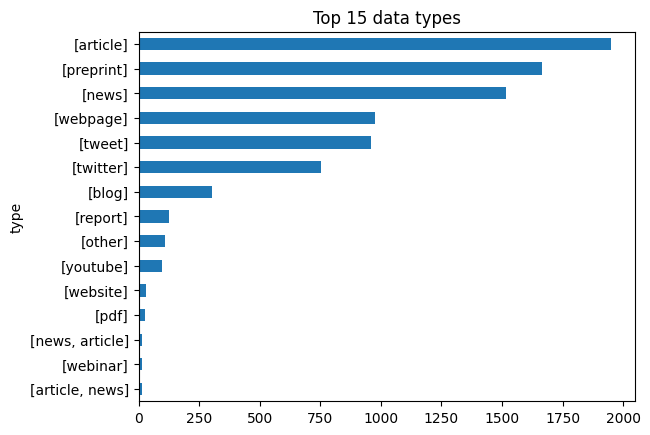

In [61]:
_ = total_anns_df[total_anns_df['is:'].str.len() > 0]['is:'].value_counts().head(15)
_.plot(kind='barh',title='Top 15 data types', ylabel='type').invert_yaxis()
plt.savefig('top_15_is.png')

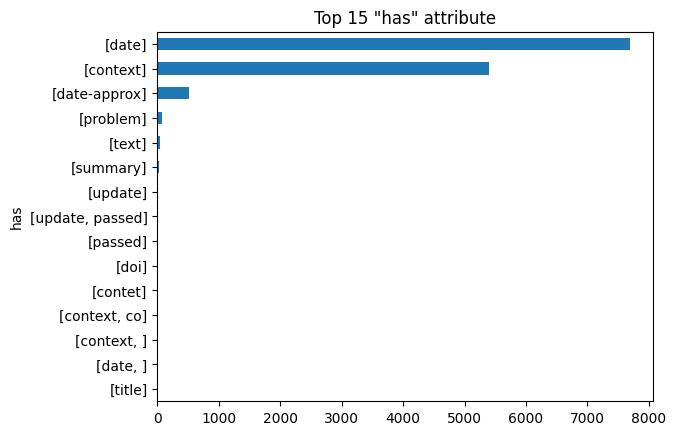

In [62]:
total_anns_df[total_anns_df['has:'].str.len() > 0]['has:'].value_counts().head(15).plot(kind='barh',
                                                                                      title='Top 15 "has" attribute',
                                                                                      ylabel='has').invert_yaxis()
plt.savefig('top_15_has.png')

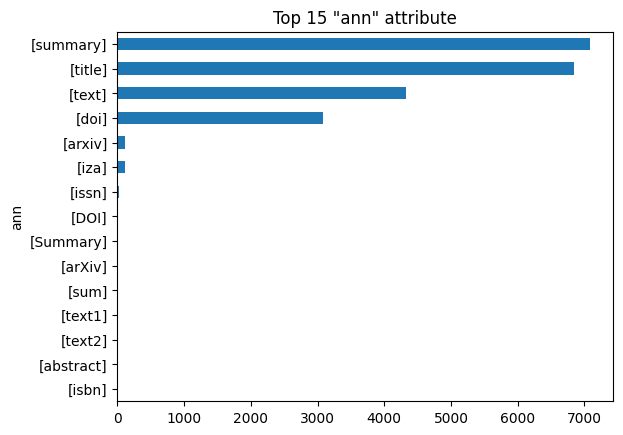

In [63]:
total_anns_df[total_anns_df['ann:'].str.len() > 0]['ann:'].value_counts().head(15).plot(kind='barh',
                                                                                      title='Top 15 "ann" attribute',
                                                                                      ylabel='ann').invert_yaxis()
plt.savefig('top_15_ann.png')

In [64]:
tag_terms_ = Counter(total_anns_df['terms_tags'].sum())
print(f"Unique tag_terms {len(tag_terms_)}")

Unique tag_terms 16349


In [65]:
tag_terms_

Counter({'models': 7,
         'epidemiology': 394,
         'forecast': 37,
         'literature': 19,
         'research': 824,
         'curation': 5,
         'interventions': 5,
         'summary': 17,
         'big data': 73,
         'news': 85,
         'resource': 21,
         'media': 153,
         'type:blog': 1,
         'misinformation': 708,
         'nudge': 13,
         'social media': 344,
         'type:preprint': 1,
         'racism': 34,
         'COVID-19': 7364,
         'coronavirus': 58,
         'pandemic': 1028,
         'ethnic discrimination': 1,
         'intersecting pandemic': 1,
         'BAME': 12,
         'policy solution': 1,
         'healthcare inequality': 1,
         'ethnic minority': 13,
         'structural racism': 3,
         'covid-19': 3,
         'SARS-CoV-2': 62,
         'xenophobia': 10,
         'USA': 1039,
         'hate crimes': 1,
         'hate speech': 7,
         'microaggression': 1,
         'racial stereotype': 1,
         '

In [66]:
tag_terms = dict(tag_terms_.most_common(150))
del tag_terms['COVID-19']
tag_terms

{'vaccine': 1950,
 'USA': 1039,
 'pandemic': 1028,
 'UK': 953,
 'research': 824,
 'vaccination': 755,
 'transmission': 751,
 'government': 715,
 'misinformation': 708,
 'data': 693,
 'policy': 682,
 'public health': 595,
 'infection': 526,
 'lockdown': 523,
 'variant': 464,
 'risk': 464,
 'science': 460,
 'mental health': 429,
 'health': 426,
 'mortality': 425,
 'social distancing': 412,
 'epidemiology': 394,
 'hospitalization': 372,
 'behavioral science': 363,
 'modeling': 360,
 'psychology': 358,
 'social media': 344,
 'children': 344,
 'testing': 344,
 'response': 318,
 'protection': 311,
 'Omicron': 295,
 'economy': 292,
 'intervention': 291,
 'strategy': 285,
 'communication': 262,
 'immunity': 251,
 'healthcare': 245,
 'death': 230,
 'survey': 218,
 'WHO': 218,
 'prediction': 211,
 'prevention': 206,
 'safety': 205,
 'effectiveness': 205,
 'England': 203,
 'education': 198,
 'behavior': 191,
 'anxiety': 188,
 'booster': 181,
 'stress': 180,
 'face mask': 173,
 'statistics': 173,


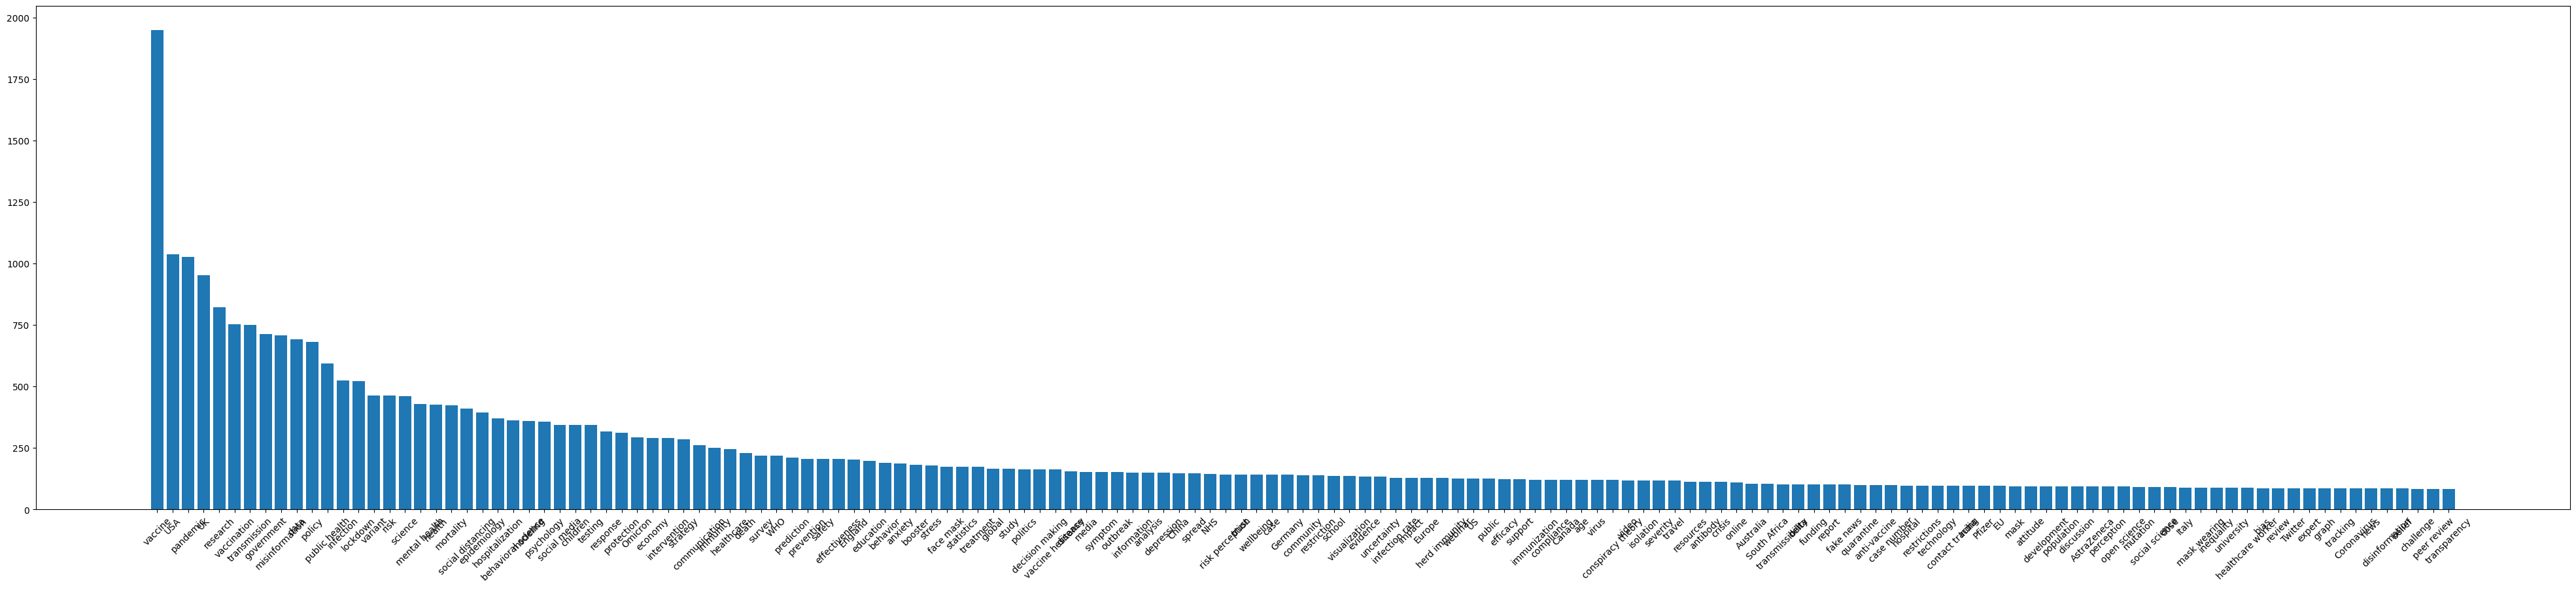

In [69]:
plt.figure(figsize=(50, 10))
plt.bar(list(tag_terms.keys()), list(tag_terms.values()))
plt.xticks(rotation=45)
plt.savefig('top_term_tags.png')